# Genetic Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [318]:
def fitness(x,y):
    return x*(x-1)*(x-2)*y*(y-1)-10

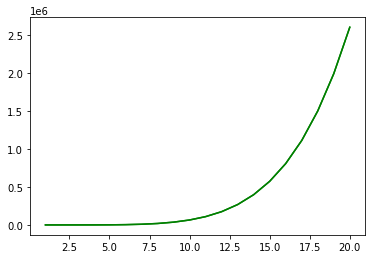

In [319]:
x = np.linspace(1, 20, num=20)
y = np.linspace(1, 20, num=20)
plt.plot(x, fitness(x, y), color='g')
plt.plot(y, fitness(x, y), color='g')

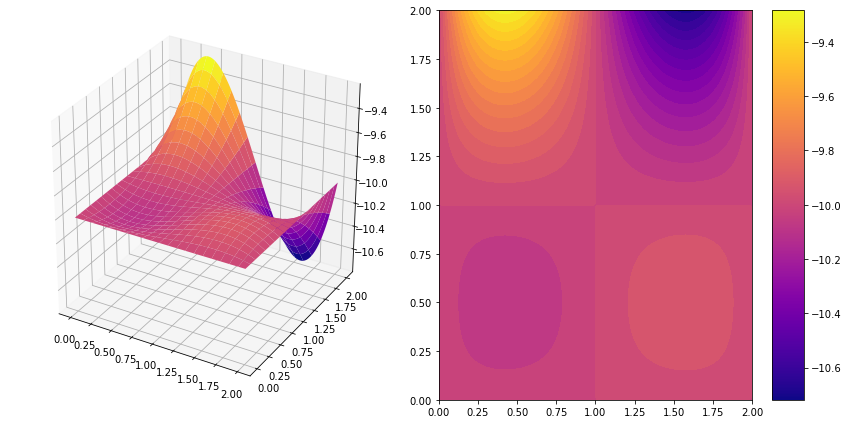

In [320]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

f = lambda x,y: fitness(x, y)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1,projection='3d')
xvalues = np.linspace(0,2,100)
yvalues = np.linspace(0,2,100)
xgrid, ygrid = np.meshgrid(xvalues, yvalues)
zvalues = f(xgrid, ygrid)
surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
ax = fig.add_subplot(1,2,2)
plt.contourf(xgrid, ygrid, zvalues, 30, cmap=cm.plasma)
fig.colorbar(surf, aspect=12)
plt.tight_layout()

In [271]:
def individual(lower_bound=0, upper_bound=2, number_of_genes=2):
    return [np.random.uniform(lower_bound, upper_bound, 1)[0] for i in range(number_of_genes)]

def generate_initial_population(size, individual_gen = individual):
    return [individual() for s in range(size)]

size = 10
population = generate_initial_population(10)

In [232]:
population

[[-0.8476387993227092, 0.7229331394669685],
 [1.213052511148748, -1.9874796089238371],
 [-1.7214300658686237, 1.8563039653197784],
 [0.2956161647563875, -1.8663174057691334],
 [-0.8929239727776759, 0.6039743917296589],
 [-1.6063922433875, 1.2349047979499255],
 [-1.8206852622029857, -0.816819361952867],
 [-1.2884493937356827, 0.5531762651071697],
 [-0.17607174352276989, 1.9504509435301491],
 [-0.9119093466908841, -1.2677356545545186]]

In [233]:
def get_parents(x, n_parents, fitness_function):
    # select n parent and sort descending 
    x.sort(key=lambda x: fitness_function(x[0], x[1]), reverse = True)
    return np.array(x[:n_parents])

In [234]:
# get 6 fittest parents
parents = get_parents(population, 6, fitness)
parents

array([[-1.82068526, -0.81681936],
       [-1.72143007,  1.85630397],
       [-0.91190935, -1.26773565],
       [ 1.21305251, -1.98747961],
       [-1.60639224,  1.2349048 ],
       [-0.17607174,  1.95045094]])

In [235]:
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[0]/2)
    for k in range(offspring_size[1]):
        # Index of the first parent to mate.
         parent1_idx = k%parents.shape[0]
         # Index of the second parent to mate.
         parent2_idx = (k+1)%parents.shape[0]
         # The new offspring will have its first half of its genes taken from the first parent.
         offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
         # The new offspring will have its second half of its genes taken from the second parent.
         offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring 

In [236]:
offspring = crossover(parents, (2,2))
offspring

array([[-1.82068526,  1.85630397],
       [-1.72143007, -1.26773565]])

In [237]:
def mutate(offspring_crossover, lower_bound, upper_bound):
    for idx in range(offspring_crossover.shape[0]):
        
        # select randomly the gene where randomness is going to be added 
        g = np.random.choice(range(offspring.shape[0]))

        # The random value to be added to the gene.
        offspring_crossover[idx][g] = offspring_crossover[idx][g] + np.random.normal(0.2, 0.25, 1)
        
        if offspring_crossover[idx][g] > upper_bound:
            offspring_crossover[idx][g] = upper_bound
        
        if offspring_crossover[idx][g] < lower_bound:
            offspring_crossover[idx][g] = lower_bound
        
    return offspring_crossover

In [208]:
mutate_offspring = mutate(offspring)

In [209]:
population = np.append(population, mutate_offspring, axis=0)

In [210]:
population.tolist().sort(key=lambda x: fitness(x[0], x[1]), reverse = True)

In [211]:
population = population[:size]

In [212]:
best_candidate = population[:1]

In [213]:
best_candidate

array([[-1.57291092, -1.98748149]])

In [214]:
fitness_values = [fitness(value_1, value_2) for value_1, value_2 in population.tolist()]

In [215]:
fitness_values[:1][0]

24.02908286400265

## Construct loop

In [322]:
epochs = 100
population = generate_initial_population(10)
for epoch in range(epochs):
    parents = get_parents(population, 6, fitness)
    offspring = crossover(parents, offspring_size=(2,2))
    offspring = mutate(offspring, 0, 2)
    population.extend(offspring) 
    population.sort(key=lambda x: fitness(x[0], x[1]), reverse = True)
    population = population[:size]
    best_candidate = population[:1]
    score = fitness(best_candidate[0][0], best_candidate[0][1])
    
best_candidate, score

([array([0.4183289, 2.       ])], -9.230264475606337)